# Librairy

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
data_dir = '../data/data'
data = pd.DataFrame()


In [3]:
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_dir, file))
        # Splitting the filename to extract city and year
        parts = file.replace('.csv', '').split('_')  # This assumes files are named like 'City_Year.csv'
        if len(parts) == 1:  # Handling filenames with space 'City Year.csv'
            parts = file.replace('.csv', '').split()
        city = parts[0]  # The city is the first element
        year = parts[-1]  # The year is the last element
        df['Year'] = year
        df['City'] = city  # Adding city to the DataFrame
        data = pd.concat([data, df], ignore_index=True)

In [4]:
ete = {'1996': 'USA', '2000': 'AUS', '2004': 'GRE', '2008': 'CHN', '2012': 'GBR', '2016': 'BRA', '2020': 'JPN', '2024': 'FRA'}
hiver = {'1994': 'NOR', '1998': 'JPN', '2002': 'USA', '2006': 'ITA', '2010': 'CAN', '2014': 'RUS', '2018': 'KOR', '2022': 'CHN'}
season_dict = {**{year: 'Summer' for year in ete}, **{year: 'Winter' for year in hiver}}

In [5]:
data['Season'] = data['Year'].apply(lambda x: season_dict.get(x, 'Unknown'))
data

,NOC,Gold,Silver,Bronze,Total,Year,City,Country Name,Country Code,Value,Season
0,USA,36.0,39.0,26.0,101.0,2004,Athens,NaN,NaN,NaN,Summer
1,CHN,32.0,17.0,15.0,64.0,2004,Athens,NaN,NaN,NaN,Summer
2,RUS,28.0,26.0,36.0,90.0,2004,Athens,NaN,NaN,NaN,Summer
3,AUS,17.0,16.0,17.0,50.0,2004,Athens,NaN,NaN,NaN,Summer
4,JPN,16.0,9.0,12.0,37.0,2004,Athens,NaN,NaN,NaN,Summer
...,...,...,...,...,...,...,...,...,...,...,...
12276,CRO,0.0,2.0,1.0,3.0,2010,Vancouver,NaN,NaN,NaN,Winter
12277,LAT,0.0,2.0,0.0,2.0,2010,Vancouver,NaN,NaN,NaN,Winter
12278,FIN,0.0,1.0,4.0,5.0,2010,Vancouver,NaN,NaN,NaN,Winter
12279,KAZ,0.0,1.0,0.0,1.0,2010,Vancouver,NaN,NaN,NaN,Winter


In [6]:
host_dict = {
    '1994': 'NOR',  # Lillehammer
    '1996': 'USA',  # Atlanta
    '1998': 'JPN',  # Nagano
    '2000': 'AUS',  # Sydney
    '2002': 'USA',  # Salt Lake City
    '2004': 'GRE',  # Athens
    '2006': 'ITA',  # Torino
    '2008': 'CHN',  # Beijing (Not listed but for completeness)
    '2010': 'CAN',  # Vancouver
    '2012': 'GBR',  # London
    '2014': 'RUS',  # Sochi
    '2016': 'BRA',  # Rio de Janeiro
    '2018': 'KOR',  # PyeongChang
    '2020': 'JPN',  # Tokyo (2020 Olympics held in 2021 due to COVID-19)
    '2022': 'CHN',  # Beijing
    '2024': 'FRA',  # Paris (Future event as of the last update, but for completeness)
}

In [7]:
data['Host'] = data.apply(lambda row: 'Yes' if host_dict.get(row['Year']) == row['NOC'] else 'No', axis=1)
data

,NOC,Gold,Silver,Bronze,Total,Year,City,Country Name,Country Code,Value,Season,Host
0,USA,36.0,39.0,26.0,101.0,2004,Athens,NaN,NaN,NaN,Summer,No
1,CHN,32.0,17.0,15.0,64.0,2004,Athens,NaN,NaN,NaN,Summer,No
2,RUS,28.0,26.0,36.0,90.0,2004,Athens,NaN,NaN,NaN,Summer,No
3,AUS,17.0,16.0,17.0,50.0,2004,Athens,NaN,NaN,NaN,Summer,No
4,JPN,16.0,9.0,12.0,37.0,2004,Athens,NaN,NaN,NaN,Summer,No
...,...,...,...,...,...,...,...,...,...,...,...,...
12276,CRO,0.0,2.0,1.0,3.0,2010,Vancouver,NaN,NaN,NaN,Winter,No
12277,LAT,0.0,2.0,0.0,2.0,2010,Vancouver,NaN,NaN,NaN,Winter,No
12278,FIN,0.0,1.0,4.0,5.0,2010,Vancouver,NaN,NaN,NaN,Winter,No
12279,KAZ,0.0,1.0,0.0,1.0,2010,Vancouver,NaN,NaN,NaN,Winter,No


# EDA

In [8]:
data.describe()

,Gold,Silver,Bronze,Total,Value
count,774.000000,774.000000,774.000000,774.000000,1.150700e+04
mean,3.476744,3.474160,3.817829,10.768734,1.005972e+12
std,6.067652,5.338355,5.323107,15.972146,4.533056e+12
min,0.000000,0.000000,0.000000,1.000000,8.824448e+06
25%,0.000000,0.000000,1.000000,2.000000,2.056874e+09
50%,1.000000,2.000000,2.000000,5.000000,1.436880e+10
75%,4.000000,4.000000,5.000000,13.000000,1.796394e+11
max,48.000000,41.000000,38.000000,121.000000,7.904923e+13


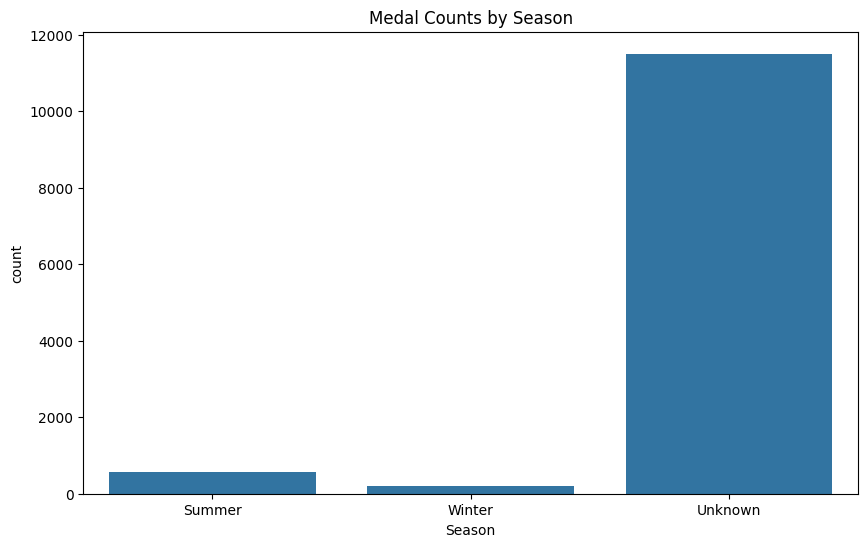

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=data)
plt.title('Medal Counts by Season')
plt.show()

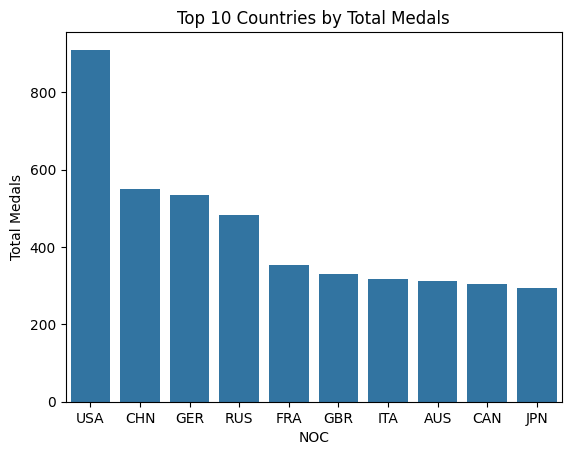

In [10]:
top_countries = data.groupby('NOC').sum()['Total'].nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Total Medals')
plt.ylabel('Total Medals')
plt.show()

/tmp/ipykernel_115882/4056626969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Total', data=data, palette="Set3")


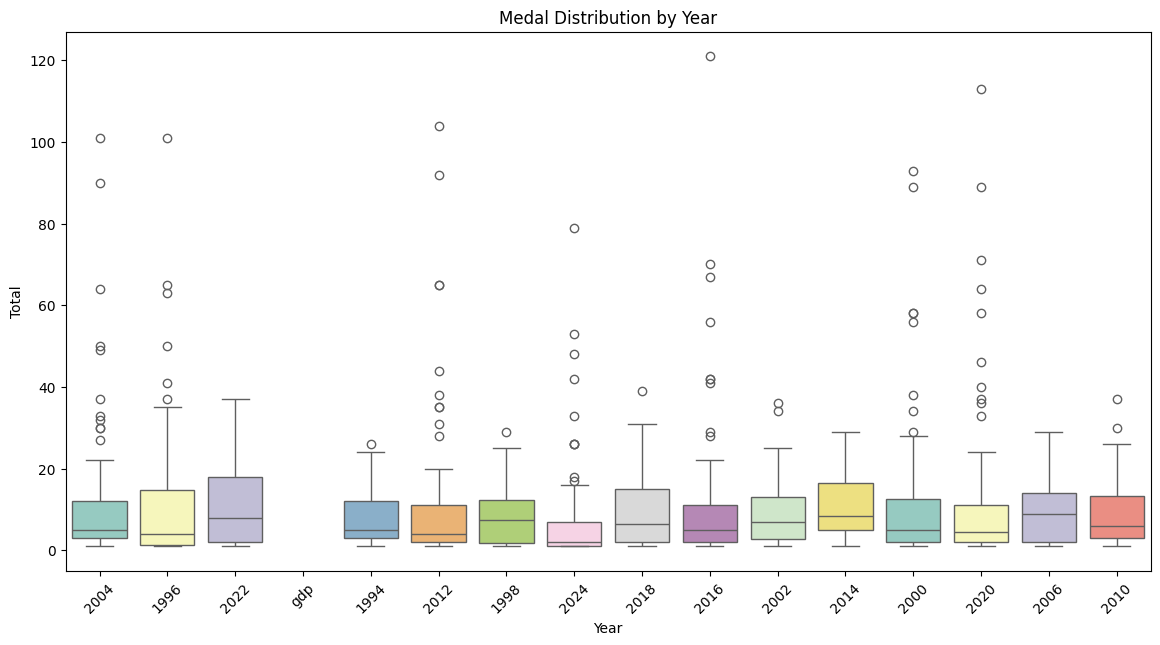

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Total', data=data, palette="Set3")
plt.title('Medal Distribution by Year')
plt.xticks(rotation=45)
plt.show()

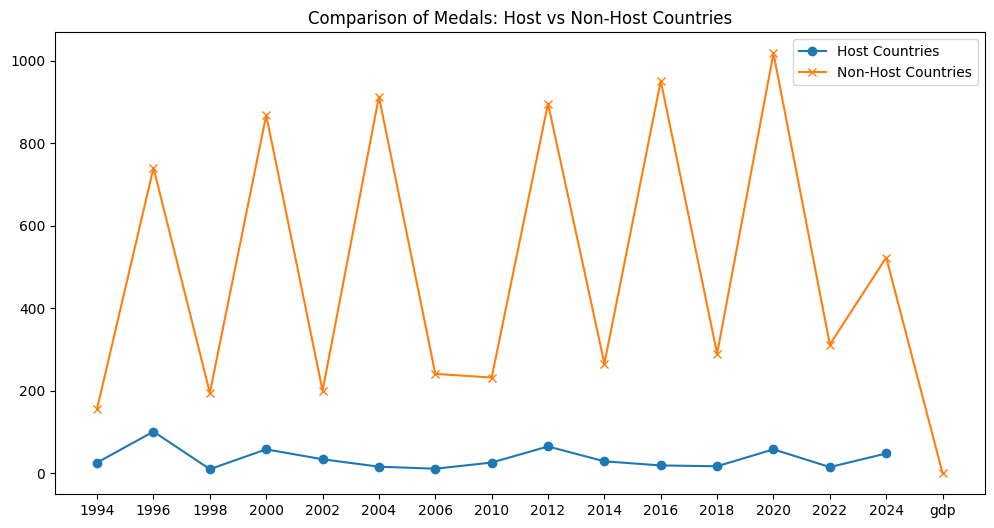

In [12]:
host_medals = data[data['Host'] == 'Yes'].groupby('Year').sum()['Total']
non_host_medals = data[data['Host'] == 'No'].groupby('Year').sum()['Total']

plt.figure(figsize=(12, 6))
plt.plot(host_medals.index, host_medals.values, label='Host Countries', marker='o')
plt.plot(non_host_medals.index, non_host_medals.values, label='Non-Host Countries', marker='x')
plt.title('Comparison of Medals: Host vs Non-Host Countries')
plt.legend()
plt.show()


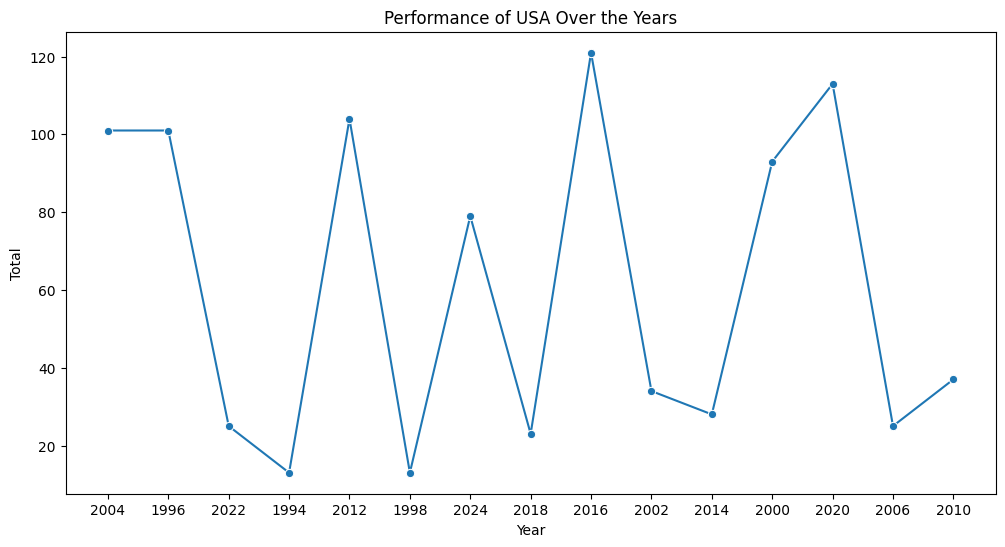

In [13]:
usa_data = data[data['NOC'] == 'USA']
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=usa_data, marker='o')
plt.title('Performance of USA Over the Years')
plt.show()

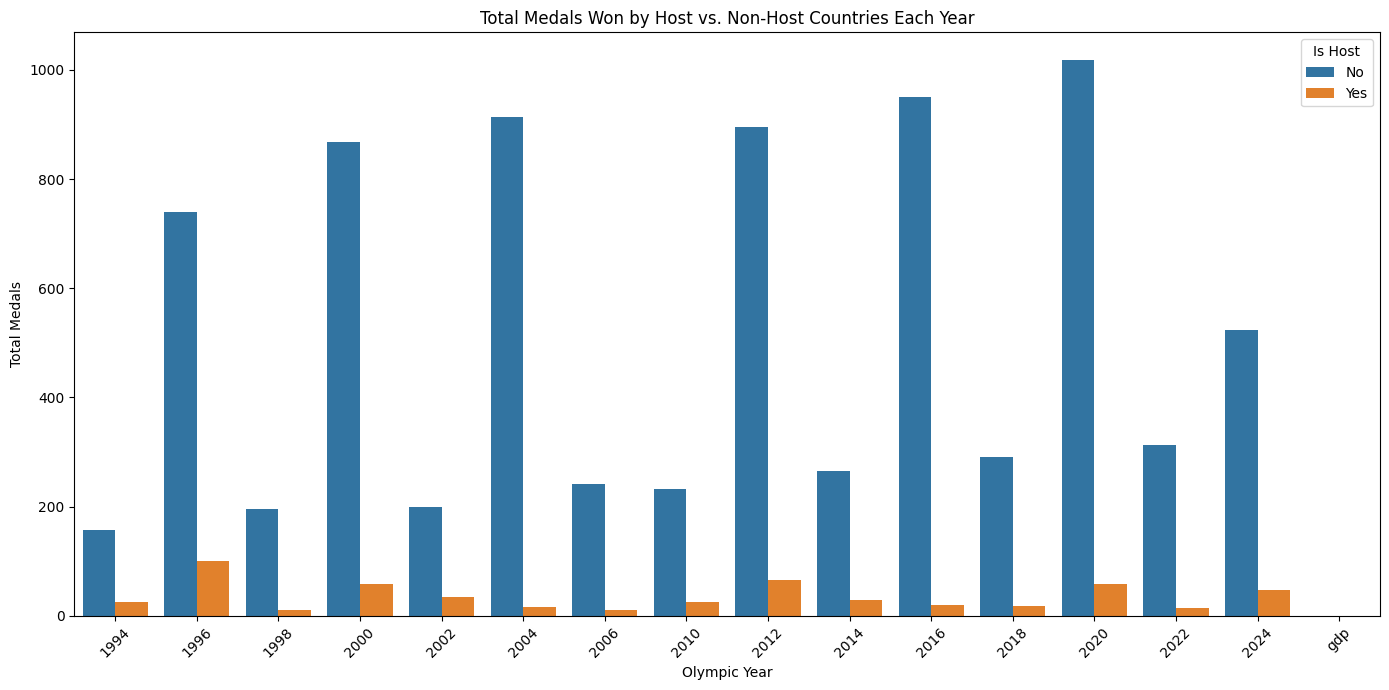

In [14]:
medal_counts_by_host_status = data.groupby(['Year', 'Host']).sum()['Total'].reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Total', hue='Host', data=medal_counts_by_host_status)
plt.title('Total Medals Won by Host vs. Non-Host Countries Each Year')
plt.xticks(rotation=45)
plt.xlabel('Olympic Year')
plt.ylabel('Total Medals')
plt.legend(title='Is Host')
plt.tight_layout()
plt.show()


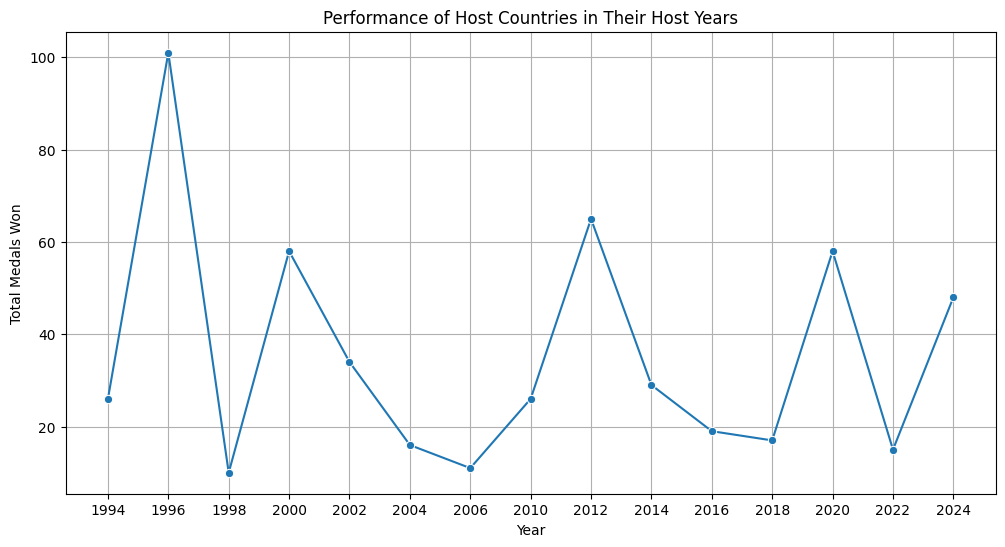

In [15]:
host_years_data = data[data['Host'] == 'Yes']

# Group by Year and sum the medals
medals_by_host_year = host_years_data.groupby('Year').sum()['Total'].reset_index()

# Create a line plot to see the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=medals_by_host_year, marker='o')
plt.title('Performance of Host Countries in Their Host Years')
plt.xlabel('Year')
plt.ylabel('Total Medals Won')
plt.grid(True)
plt.show()


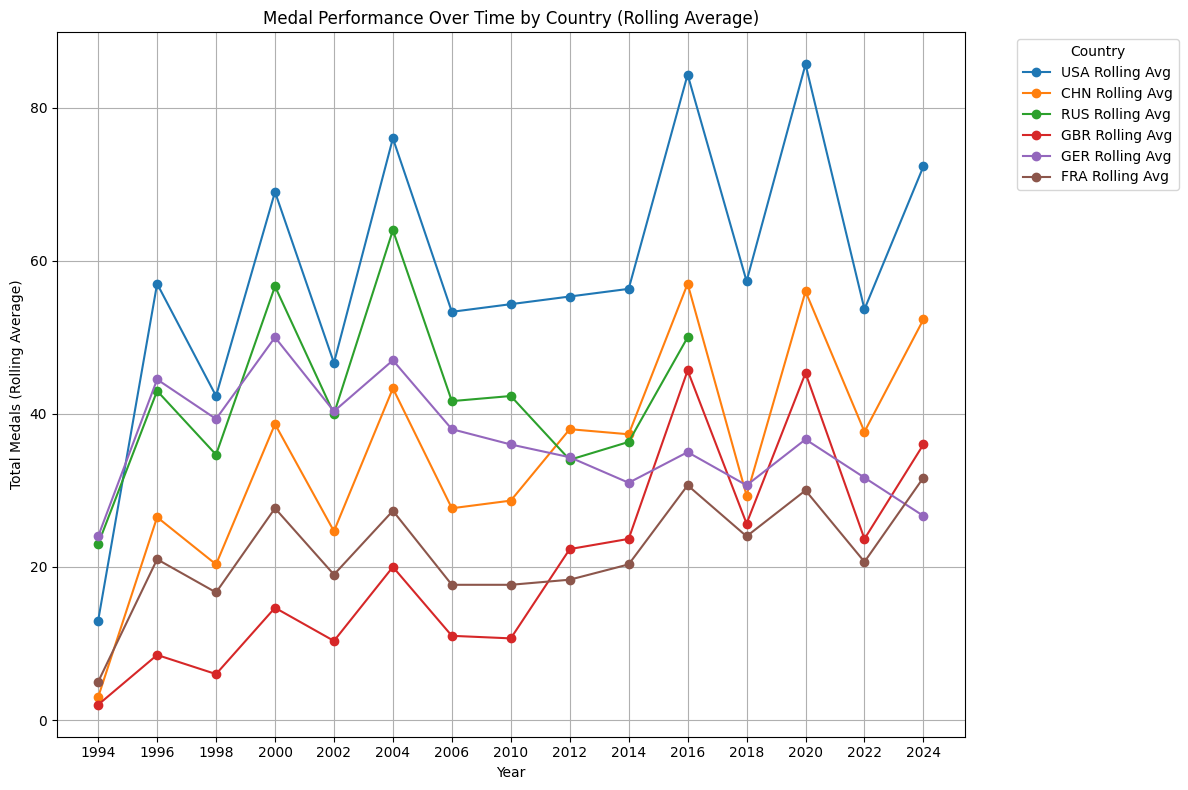

In [16]:
countries = ['USA', 'CHN', 'RUS', 'GBR', 'GER', 'FRA']

plt.figure(figsize=(12, 8))

for country in countries:
    country_data = data[data['NOC'] == country].sort_values('Year')
    country_data['Rolling_Medal_Count'] = country_data['Total'].rolling(window=3, min_periods=1).mean()
    plt.plot(country_data['Year'], country_data['Rolling_Medal_Count'], marker='o', label=f"{country} Rolling Avg")

plt.title('Medal Performance Over Time by Country (Rolling Average)')
plt.xlabel('Year')
plt.ylabel('Total Medals (Rolling Average)')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
gdp_data = pd.read_csv('../data/data/gdp.csv')
gdp_data['Year'] = pd.to_numeric(gdp_data['Year'])
gdp_data.rename(columns={'Value': 'GDP'}, inplace=True)
data = pd.merge(data, gdp_data, left_on=['NOC', 'Year'], right_on=['Country Code', 'Year'], how='left')

data.head()

ValueError: You are trying to merge on object and int64 columns for key 'Year'. If you wish to proceed you should use pd.concat